<div style="border:3px; border-style:solid; border-color:darkred; padding: 1em;background-color:snow;">
    <h1 style='color:black;text-align:center;font-family:courier;'>WHO LIFE EXPECTANCY AND SUICIDE RATES </h1>
        <p style='color:black;text-align:center;font-family:courier;'>A Regression Analysis </p>
    </div>

In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from matplotlib import pyplot as plt

%matplotlib inline
%run utils.ipynb

In [39]:
# Settings
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows', 500)

In [40]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

<div style="border:3px; border-style:solid; border-color:darkred; padding: 1em;background-color:snow;">
    <h2 style='color:black;text-align:center;font-family:courier;'>EXPLORATORY ANALYSIS</h2>
    </div>

### Read Input Datasets

In [41]:
suicideDF  = pd.read_csv('who_suicide_statistics.csv')

In [42]:
lifeDF = pd.read_csv('Life Expectancy Data.csv')


#### Suicide Dataset:

**Initial investigation-Nulls,value counts**

In [43]:
suicideDF.head(n=1)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,nan,277900.000000


In [44]:
suicideDF.isna().sum()

country        0   
year           0   
sex            0   
age            0   
suicides_no    2256
population     5460
dtype: int64

In [45]:
suicideDF.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,38316.000000
mean,1998.502467,193.315390,1664091.135374
std,10.338711,800.589926,3647231.227487
min,1979.000000,0.000000,259.000000
25%,1990.000000,1.000000,85112.750000
50%,1999.000000,14.000000,380655.000000
75%,2007.000000,91.000000,1305698.000000
max,2016.000000,22338.000000,43805214.000000


In [46]:
# suicideDF = suicideDF.dropna()

**Q1:How does the number of suicides change in time?**

In [47]:
year_suicideDF = suicideDF.groupby(['year']).apply(get_rate)

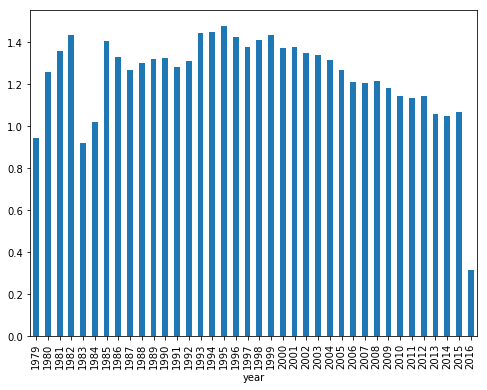

In [48]:
fig,ax = plt.subplots(figsize=(8,6))
year_suicideDF.plot(x='year', y='suicide_rate',ax=ax, kind='bar')

**Q2:Who commit more? Females or Males**

In [49]:
year_gender_suicideDF = suicideDF.groupby(['year','sex']).apply(get_rate).unstack('sex')

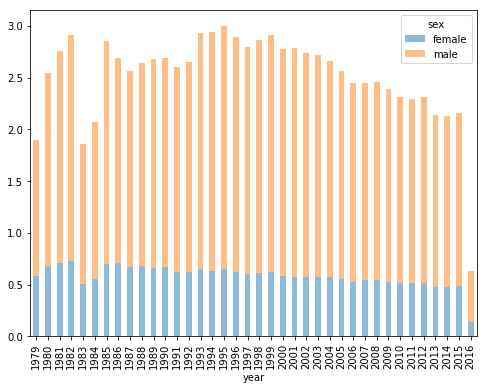

In [50]:
fig,ax = plt.subplots(figsize=(8,6))
year_gender_suicideDF.plot(stacked=True, ax=ax,alpha=0.5, kind='bar')

**Q3:What is the distribution among countries?**    

In [51]:
year_country_suicideDF = suicideDF.groupby(['year','country']).apply(get_rate).unstack('country')

In [52]:
year_suicideDF_less = year_country_suicideDF.iloc[:,range(1,100,5)].reset_index()

In [53]:
year_suicideDF_less[year_suicideDF_less['year']==2015]

country,year,Anguilla,Australia,Barbados,Bolivia,Bulgaria,Colombia,Czech Republic,Egypt,Finland,Greece,Haiti,Iran (Islamic Rep of),Jamaica,Kuwait,Macau,Mauritius,Montenegro,New Zealand,Panama,Portugal
36,2015,nan,1.361013,nan,nan,nan,0.524158,1.388482,0.006085,1.410708,0.512037,nan,0.327349,nan,nan,nan,0.900551,nan,nan,0.306973,nan


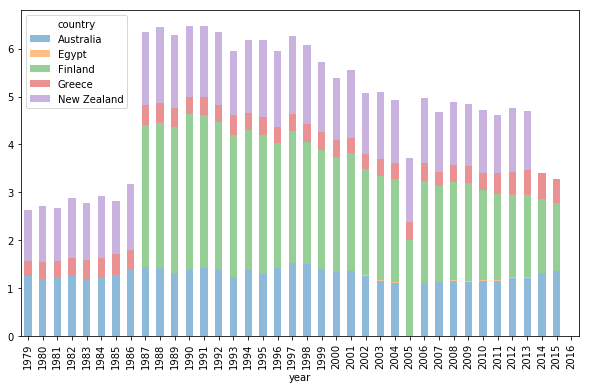

In [54]:
fig,ax = plt.subplots(figsize=(10,6))
year_country_suicideDF.loc[:,['Australia','Egypt', 'Finland','Greece','New Zealand']].plot(stacked=True, alpha=0.5,ax=ax, kind='bar')

#### Life Expectancy Dataset:

**Initial investigation-Nulls,value counts**

In [55]:
lifeDF.head(n=1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000000,263.000000,62,0.010000,71.279624,65.000000,1154,19.100000,83,6.000000,8.160000,65.000000,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000


In [56]:
lifeDF.isna().sum()

Country                            0  
Year                               0  
Status                             0  
Life expectancy                    10 
Adult Mortality                    10 
infant deaths                      0  
Alcohol                            194
percentage expenditure             0  
Hepatitis B                        553
Measles                            0  
 BMI                               34 
under-five deaths                  0  
Polio                              19 
Total expenditure                  226
Diphtheria                         19 
 HIV/AIDS                          0  
GDP                                448
Population                         652
 thinness  1-19 years              34 
 thinness 5-9 years                34 
Income composition of resources    167
Schooling                          163
dtype: int64

**Q1:Which features seem to have a strong relation to life expectancy?**

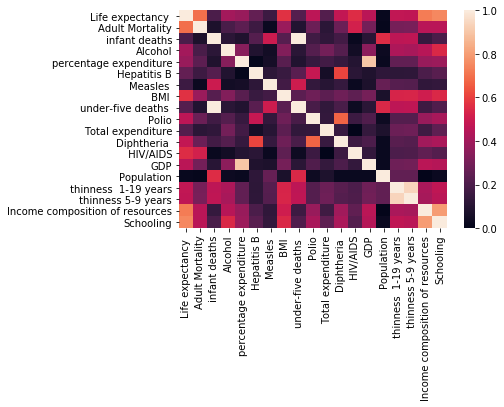

In [57]:
sns.heatmap(abs(lifeDF.drop(columns=['Year'],axis=1).corr()))

*We can directly conclude that Income,schooling,adult mortality, GDP, BMI and diseases(Polio, Diphtheria) has higher correlation(positive or negative) to life expectancy*

**Q2:How life expectancy changed in time?**

In [58]:
year_lifeDF = lifeDF.groupby(['Year']).agg({'Life expectancy ':'mean'}).reset_index()

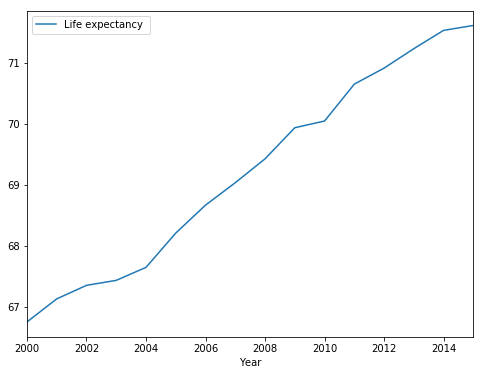

In [59]:
fig,ax = plt.subplots(figsize=(8,6))
year_lifeDF.plot(x='Year', y='Life expectancy ',ax=ax)

<div style="border:3px; border-style:solid; border-color:darkred; padding: 1em;background-color:snow;">
    <h2 style='color:black;text-align:center;font-family:courier;'>DATA PREPROCESSING</h2>
    </div>

#### Remove Nulls

In [60]:
suicideDF = suicideDF.dropna()

In [61]:
lifeDF = lifeDF.dropna(subset=['Life expectancy '], axis=0)

#### Calculate Suicide Rate for Countries

In [62]:
suicideDF = suicideDF.groupby(['year','country']).apply(get_rate).to_frame().reset_index()

In [63]:
suicideDF.columns =['year','country','suicide_rate']

#### Merge Suicide and Life Expectancy Datasets on Country and Year

In [64]:
mergedDF = pd.merge(lifeDF, suicideDF, left_on=['Country','Year'], right_on=['country','year'], how='inner')

In [65]:
mergedDF.drop(['country','year'], axis=1, inplace=True)

#### Encode Categorical Variables

In [66]:
mergedDF = encode_categorical(mergedDF)

#### Split the Data into Train and Test Datasets

**Create input and target variable for regression analysis**

In [67]:
X = mergedDF.drop(columns=['Life expectancy '], axis=1)

In [68]:
y= mergedDF['Life expectancy ']

**Split the data**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

##### Prepare Training Data

**Impute Missing Values**

In [70]:
imputer, scaler, scaled_X_train = impute_and_scale(X_train)

In [71]:
_,_,scaled_X_test = impute_and_scale(X_test, imputer=imputer, scaler=scaler)

<div style="border:3px; border-style:solid; border-color:darkred; padding: 1em;background-color:snow;">
    <h2 style='color:black;text-align:center;font-family:courier;'>REGRESSION ANALYSIS</h2>
    </div>

In [72]:
model, train_r2score, train_mse = run_model(scaled_X_train, y_train)

R2 score is : 0.9800292723107096, MSE is :0.6075902604756516


In [73]:
_, test_r2score, test_mse = run_model(scaled_X_test, y_test)

R2 score is : 0.9722277220787324, MSE is :0.7731494252873562


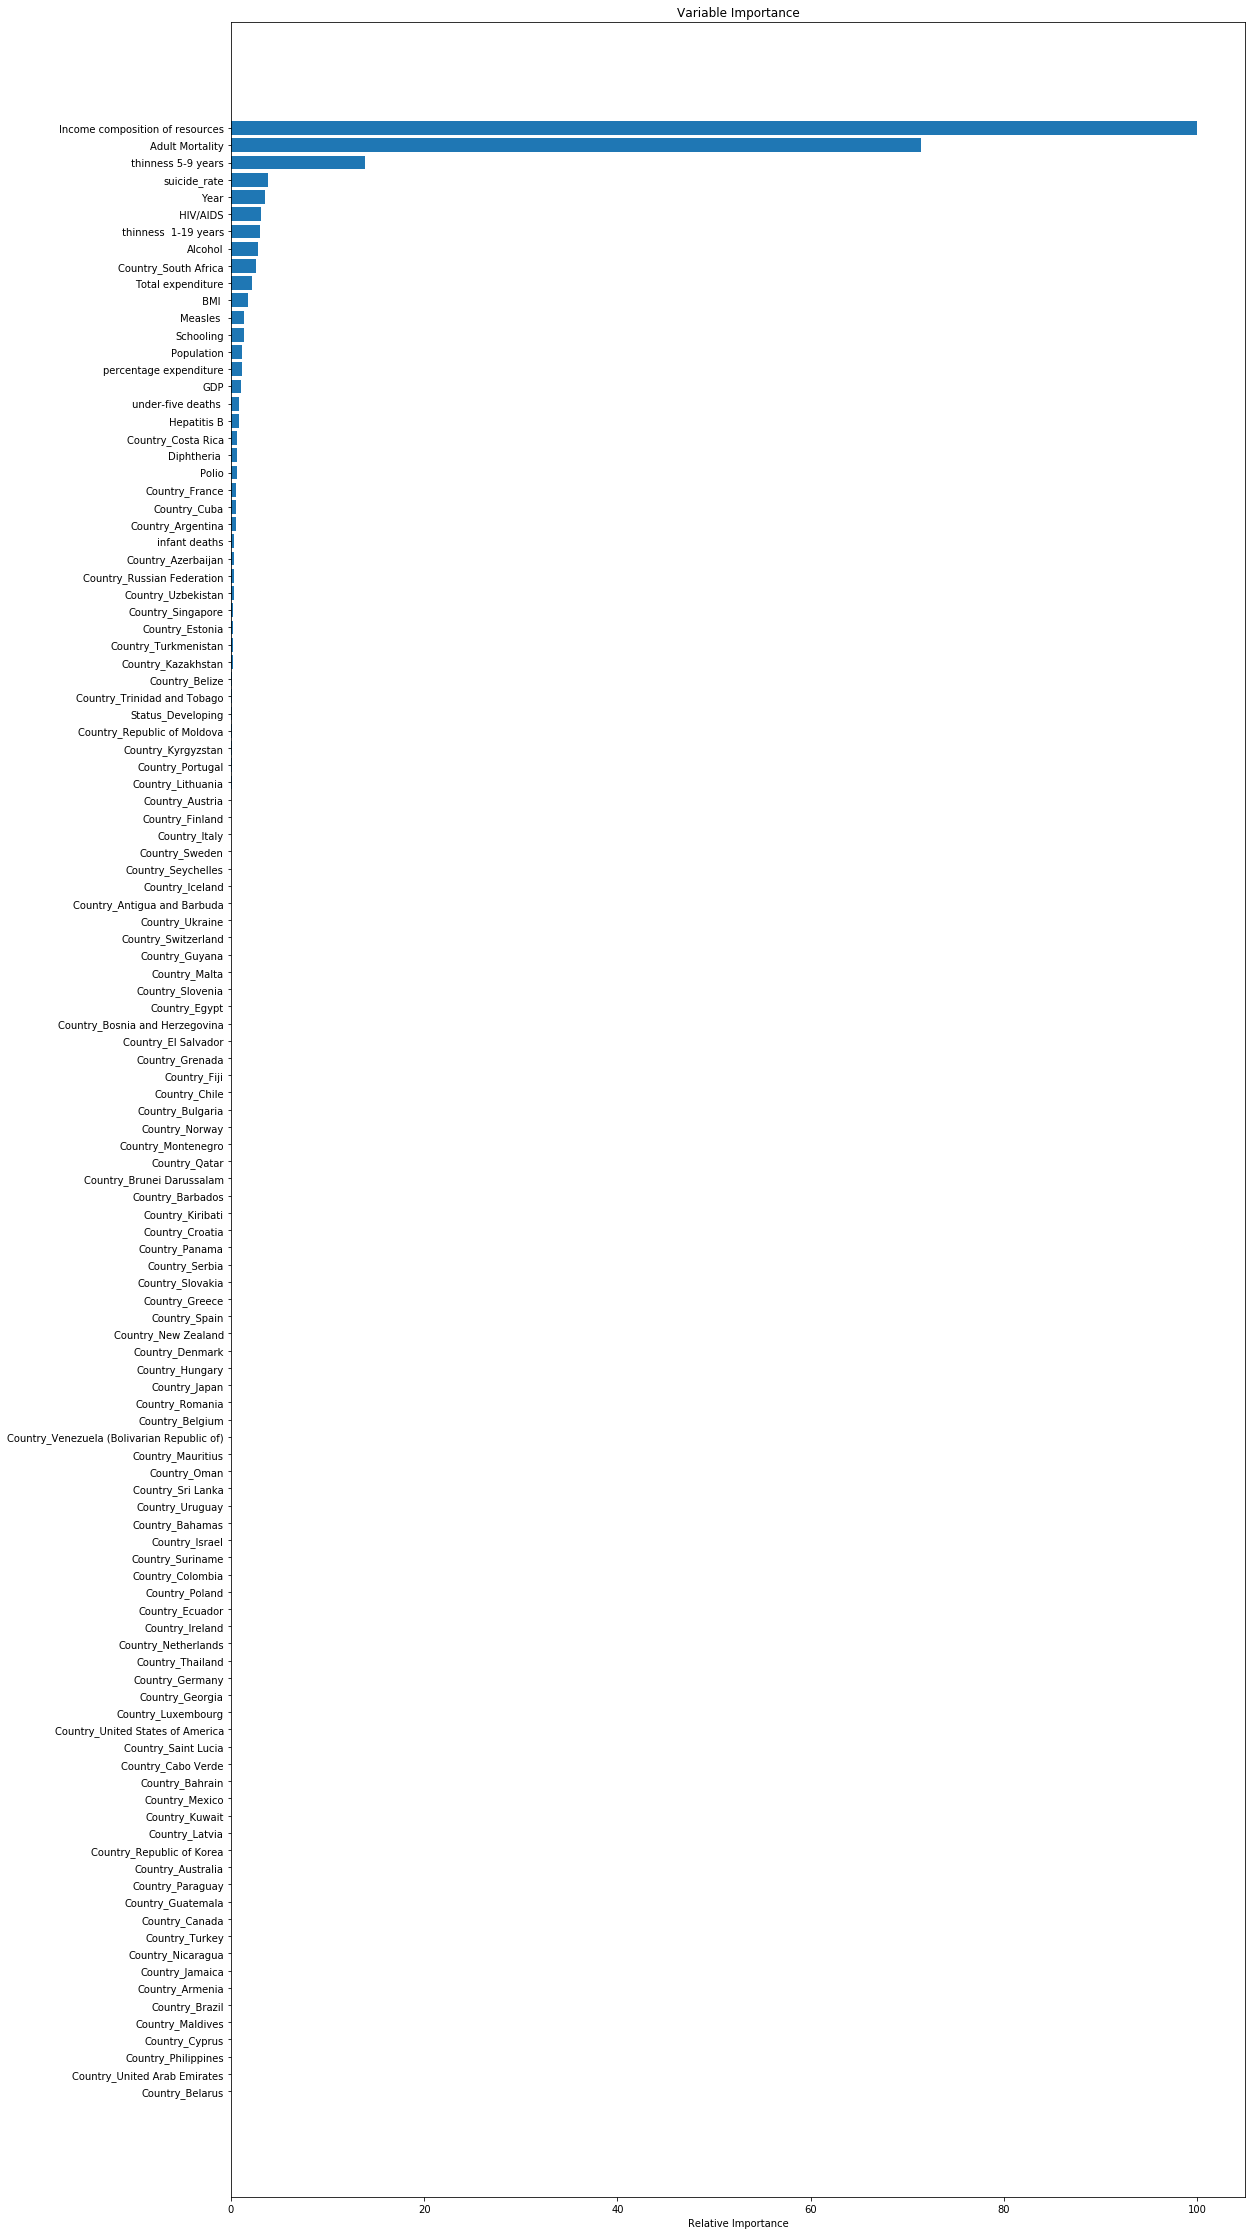

In [74]:
plot_feature_importances(model, scaled_X_train)